In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import nltk 
import string
import re
from sklearn.feature_extraction import text
from textblob import TextBlob
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [2]:
yoga = pd.read_excel('GoHundred - yoga.xlsx')
exercise = pd.read_excel('GoHundred - exercise.xlsx')
meditation = pd.read_excel('GoHundred - meditation.xlsx')
zumba = pd.read_excel('GoHundred - zumba.xlsx')
gym = pd.read_excel('GoHundred - gymnastics.xlsx')
pilates = pd.read_excel('GoHundred - pilates.xlsx')
bodyweight = pd.read_excel('GoHundred - bodyweight exercise.xlsx')
crossfit = pd.read_excel('GoHundred - crossfit.xlsx')

In [3]:
datasets = pd.concat([yoga,exercise,meditation,zumba,gym,pilates,bodyweight,crossfit],)
datasets.head(2)

,social_type,title,date,url,sentiment
0,facebook,Monday Yoga Flow + Intention Setting now on Yo...,2020-06-01,https://www.facebook.com/rachelsyoga/videos/30...,NEUTRAL
1,facebook,I have felt FANTASTIC in my body all throughou...,2020-05-29,https://www.facebook.com/128573473884902/posts...,POSITIVE


In [4]:
datasets.shape

(2184, 5)

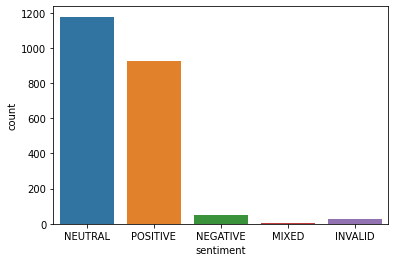

In [5]:
ploting = sns.countplot(x = 'sentiment', data = datasets)

In [6]:
datasets['sentiment'] = datasets['sentiment'].astype('category')
datasets.dtypes
datasets['Sentiment'] = datasets['sentiment'].cat.codes
datasets.head(2)
x=datasets.sentiment.value_counts()[:3]

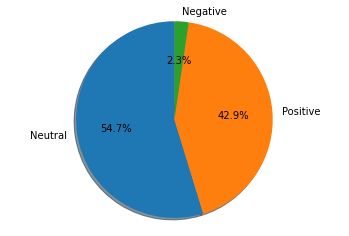

In [7]:
labels ='Neutral','Positive','Negative'
plt.pie (x,labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

In [8]:
tweet_All = " ".join(review for review in datasets.title)
#tweet_All

In [9]:
# stop = text.ENGLISH_STOP_WORDS
all_stopwords = stopwords.words('english')
all_stopwords.append('retrowwfufc')
all_stopwords.append('rt')
all_stopwords.append('class')
all_stopwords.append('join')
all_stopwords.append('us')
all_stopwords.append('day')
all_stopwords.append('twitter')
all_stopwords.append('mat')
all_stopwords.append('new')
all_stopwords.append('today')
all_stopwords.append('get')
all_stopwords.append('week')
all_stopwords.append('classes')
all_stopwords.append('live')
all_stopwords.append('time')
all_stopwords.append('practice')
all_stopwords.append('home')
all_stopwords.append('morning')
all_stopwords.append('studio')
all_stopwords.append('back')
all_stopwords.append('one')
all_stopwords.append('zartajgulwazir')
# all_stopwords.append('e')


# , 'instagram', 'twitter', 'youtube', 'tiktok'
# Basic text cleaning function
def remove_noise(text):
    
    # Make lowercase
    text = text.apply(lambda x: " ".join(x.lower() for x in x.split()))
    
    # Remove whitespaces
    text = text.apply(lambda x: " ".join(x.strip() for x in x.split()))
    
    # Remove special characters
    text = text.apply(lambda x: "".join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))
    
    # Remove punctuation
    text = text.str.replace('[^\w\s]', '')
    
    # Remove numbers
    text = text.str.replace('\d+', '')
    
    # Remove Stopwords
    text = text.apply(lambda x: ' '.join([word for word in x.split() if word not in (all_stopwords)]))
    
    # Convert to string
    text = text.astype(str)
        
    return text

# Applying noise removal function to data
datasets['Filtered_Review_Text'] = remove_noise(datasets['title'])
datasets
#datasets.head()

,social_type,title,date,url,sentiment,Sentiment,Filtered_Review_Text
0,facebook,Monday Yoga Flow + Intention Setting now on Yo...,2020-06-01,https://www.facebook.com/rachelsyoga/videos/30...,NEUTRAL,3,monday yoga flow intention setting yogagirlcom...
1,facebook,I have felt FANTASTIC in my body all throughou...,2020-05-29,https://www.facebook.com/128573473884902/posts...,POSITIVE,4,felt fantastic body throughout quarantine real...
2,facebook,Live Shaking Meditation + Dance Party starting...,2020-05-29,https://www.facebook.com/rachelsyoga/videos/26...,NEUTRAL,3,shaking meditation dance party starting yogagi...
3,facebook,Feeling low? Anxious? Overwhelmed? TODAY WE SH...,2020-05-29,https://www.facebook.com/128573473884902/posts...,POSITIVE,4,feeling low anxious overwhelmed shake
4,facebook,Tune-in to the #HubLive today at 5PM IST on In...,2020-05-27,https://www.facebook.com/128573473884902/posts...,NEUTRAL,3,tunein hublive pm ist instagram watch flow dha...
...,...,...,...,...,...,...,...
135,web,Michigan's Best Workout: CrossFit - mlive.com,2020-06-02,http://feedproxy.google.com/~r/Michigan_Guide/...,NEUTRAL,3,michigans best workout crossfit mlivecom
136,web,CrossFit Los Angeles - Google My Maps,2020-06-02,https://maps.google.com/maps/ms?hl=en&ie=UTF8&...,NEUTRAL,3,crossfit los angeles google maps
137,web,Eat Like the Fittest Man on Earth | Outside On...,2020-06-02,https://news.google.com/articles/CAIiELzV-qRbA...,NEUTRAL,3,eat like fittest man earth outside online
138,web,Paradiso CrossFit Venice - Best Crossfit Gym &...,2020-06-02,https://www.google.com/maps/search/?api=1&quer...,NEUTRAL,3,paradiso crossfit venice best crossfit gym per...


In [10]:
from nltk import FreqDist
freq_all_normalized = FreqDist(list(" ".join(datasets.Filtered_Review_Text).split())).most_common(75)
freq_all_normalized[:8]

[('yoga', 542),
 ('pilates', 498),
 ('exercise', 123),
 ('crossfit', 117),
 ('bodyweight', 109),
 ('zumba', 88),
 ('meditation', 81),
 ('gymnastics', 78)]

In [11]:
freq_tweets_hashtag = FreqDist(list((" ".join(datasets.Filtered_Review_Text)).split())).most_common(75)
freq_tweets_hashtag = pd.DataFrame(freq_tweets_hashtag, columns=['words', 'frequency'])
words=freq_tweets_hashtag[:8]
words

,words,frequency
0,yoga,542
1,pilates,498
2,exercise,123
3,crossfit,117
4,bodyweight,109
5,zumba,88
6,meditation,81
7,gymnastics,78


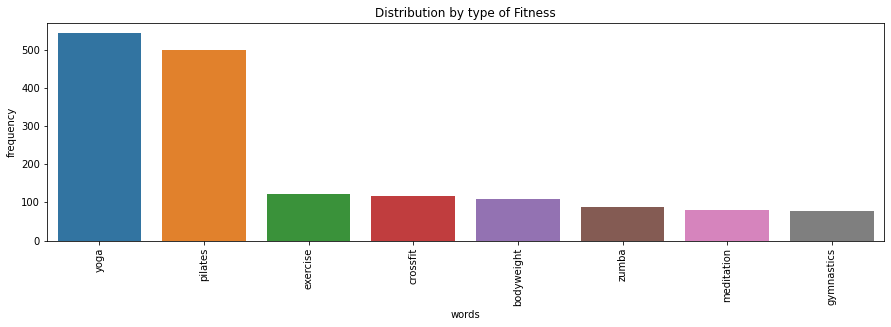

In [12]:
plt.figure(figsize=(15,4))
sns.barplot(x='words', y='frequency',data=words)
plt.xticks(rotation = 90)
plt.title('Distribution by type of Fitness')
plt.show()

In [13]:
df_neutral = datasets[datasets['sentiment']=="NEUTRAL"]
df_positive = datasets[datasets['sentiment']=="POSITIVE"]
df_negative = datasets[datasets['sentiment']=="NEGATIVE"]

In [18]:
pos_words =[]
neg_words = []
neutral_words = []

pos_words =[]
neg_words = []
neutral_words = []

for review in df_positive.Filtered_Review_Text:
    pos_words.append(review) 
pos_words = ' '.join(pos_words)
pos_words[:]

for review in df_negative.Filtered_Review_Text:
    neg_words.append(review)
neg_words = ' '.join(neg_words)
neg_words[:]

for review in df_neutral.Filtered_Review_Text:
    neutral_words.append(review)
neutral_words = ' '.join(neutral_words)
neutral_words[:]

'monday yoga flow intention setting yogagirlcom wwwyogagirlcom shaking meditation dance party starting yogagirlcom tunein hublive pm ist instagram watch flow dhara ep yogashots free gyan yoga flow weekly intention setting starting yogagirlcom moon ceremony yogagirlcom wwwyogagirlcom todays yoga girl podcast episode rachel reflects patterns relationships serving throughout life common thread played role decision making true actively playing part things serve life monday yoga flow intention setting yogagirlcom shaking meditation mini dance party wwwyogagirlcom wwwyogagirlcom yoga girl life lacking boundaries intuition warned something unfair unbalanced ignored intuition order creating outer order helps focus create inner calm best way clear headspace move body anchor breath release yoga intention setting card reading wwwyogagirlcom mean human garden give answers full moon ceremony yogagrilcom wwwyogagirlcom full moon ceremony pm est monday flow intention setting wwwyogagirlcom holding on

# Positive reviews

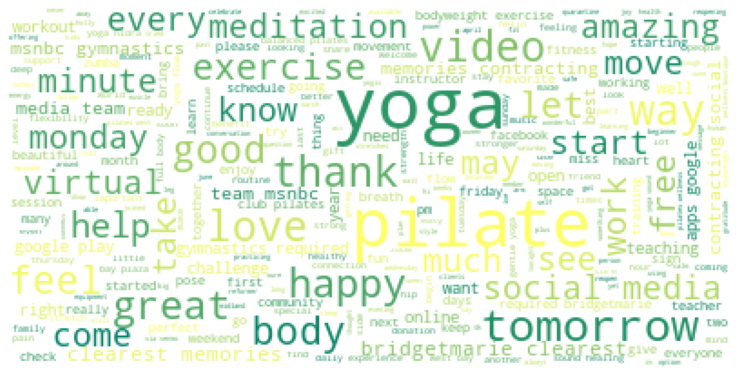

In [19]:
wordcloud = WordCloud().generate(pos_words)

wordcloud = WordCloud(background_color="white",max_words=len(pos_words),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Negative Tweets:

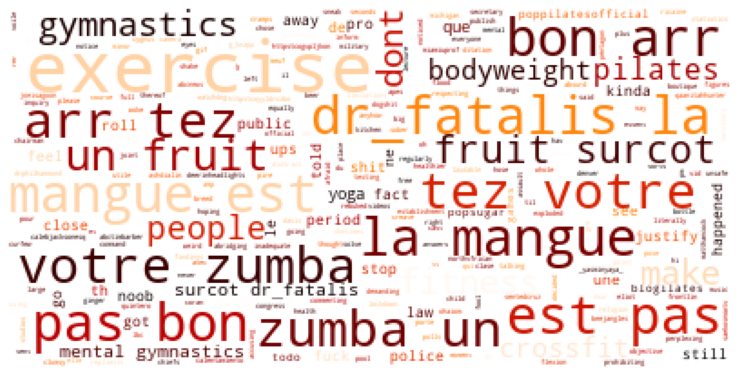

In [20]:
wordcloud = WordCloud().generate(neg_words)

wordcloud = WordCloud(background_color="white",max_words=len(neg_words),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


# Neutral Tweets

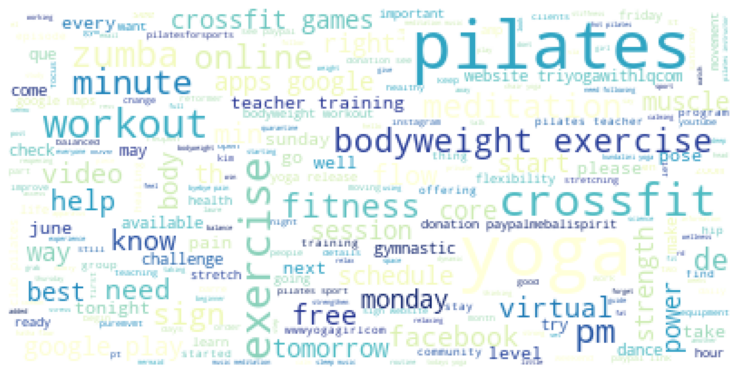

In [21]:
wordcloud = WordCloud().generate(neutral_words)

wordcloud = WordCloud(background_color="white",max_words=len(neutral_words),\
                      max_font_size=40, relative_scaling=.5, colormap='YlGnBu').generate(neutral_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()